In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Eyploration des fichier WBDSascii
df = pd.read_csv(r'C:\Users\Nathan\Desktop\WBDSascii\WBDS01walkO01Cgrf.txt',
                 sep = "	")


#df = pd.read_csv(r'C:\Users\Nathan\Desktop\WBDSascii\WBDS01walkO01Fgrf.txt',
#                 sep = "	")

#df = pd.read_csv(r'C:\Users\Nathan\Desktop\WBDSascii\WBDS01walkO01Sgrf.txt',
#                 sep = "	")

DataLeft = pd.read_csv(r'C:\Users\Nathan\Desktop\Guttenberg Gait Database\GRF_F_V_PRO_left.csv')
DataRight = pd.read_csv(r'C:\Users\Nathan\Desktop\Guttenberg Gait Database\GRF_F_V_PRO_right.csv')

df.head()
DataLeft.head()
DataRight.head()
#print(DataLeft.shape, DataRight.shape)

,DATASET_ID,SUBJECT_ID,SESSION_ID,TRIAL_ID,F_V_PRO_1,F_V_PRO_2,F_V_PRO_3,F_V_PRO_4,F_V_PRO_5,F_V_PRO_6,...,F_V_PRO_92,F_V_PRO_93,F_V_PRO_94,F_V_PRO_95,F_V_PRO_96,F_V_PRO_97,F_V_PRO_98,F_V_PRO_99,F_V_PRO_100,F_V_PRO_101
0,1,1,1,1,0.033706,0.116697,0.244264,0.382120,0.475999,0.515818,...,0.701255,0.589878,0.482330,0.385594,0.300951,0.226715,0.162141,0.107960,0.065089,0.033695
1,1,1,1,2,0.033708,0.119134,0.252672,0.405037,0.519409,0.577123,...,0.764003,0.644486,0.524728,0.413526,0.316615,0.234495,0.165511,0.108976,0.065130,0.033703
2,1,1,1,3,0.033733,0.127614,0.277253,0.449443,0.577346,0.639508,...,0.748612,0.630682,0.513999,0.407041,0.313942,0.233966,0.165631,0.109086,0.065165,0.033708
3,1,1,1,4,0.033698,0.130246,0.284735,0.463637,0.600479,0.676304,...,0.701198,0.589545,0.484617,0.391122,0.308317,0.233924,0.167672,0.111230,0.066348,0.033697
4,1,1,1,5,0.033713,0.128601,0.279892,0.454666,0.587254,0.656661,...,0.745069,0.626061,0.508896,0.402473,0.310545,0.231880,0.164743,0.109039,0.065376,0.033707


In [3]:
def TransformDataFrame(DataFrame):
    DataFrame = DataFrame.drop(['DATASET_ID', 'SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID'], axis = 1)
    DataFrame = DataFrame.T
    return DataFrame

def SelectSuject(ID, DataLeft, DataRight):
    DataSubjectLeft = DataLeft[DataLeft['SUBJECT_ID'] == ID]
    DataSubjectRight = DataRight[DataRight['SUBJECT_ID'] == ID]
    DataSubjectLeft = TransformDataFrame(DataSubjectLeft)
    DataSubjectRight = TransformDataFrame(DataSubjectRight)
    DataSubjectRight['GrfMean'] = DataSubjectRight.mean(axis=1)
    DataSubjectLeft['GrfMean'] = DataSubjectLeft.mean(axis=1)
    return DataSubjectLeft, DataSubjectRight


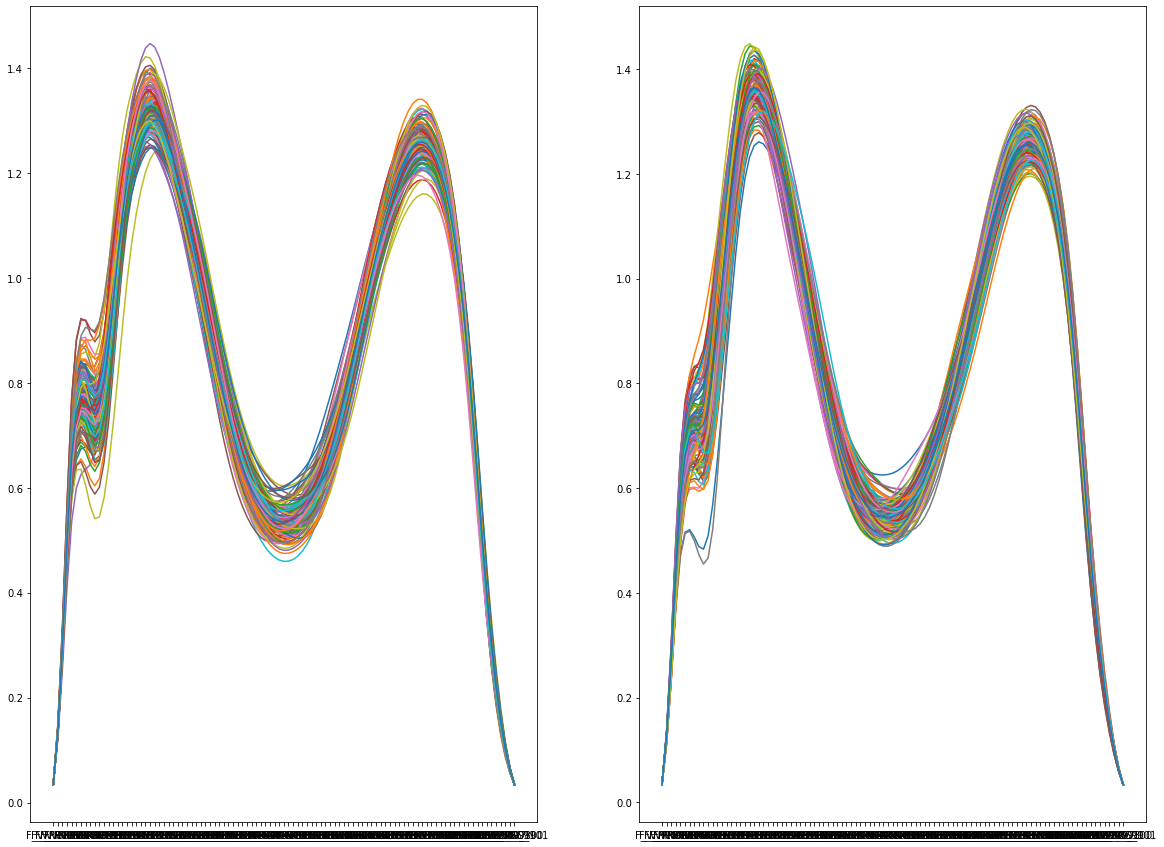

In [4]:
DataSubject1Left = DataLeft[DataLeft['SUBJECT_ID'] == 200]
DataSubject1Left = DataSubject1Left.drop(['DATASET_ID', 'SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID'], axis = 1)
DataSubject1Left = DataSubject1Left.T

DataSubject1Right = DataRight[DataRight['SUBJECT_ID'] == 200]
DataSubject1Right = DataSubject1Right.drop(['DATASET_ID', 'SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID'], axis = 1)
DataSubject1Right = DataSubject1Right.T

DataSubject1Left, DataSubject1Right = SelectSuject(1, DataLeft, DataRight)

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
for step in DataSubject1Left.columns:
    plt.plot(DataSubject1Left[step])
plt.subplot(1,2,2)
for step in DataSubject1Right:
    plt.plot(DataSubject1Right[step])


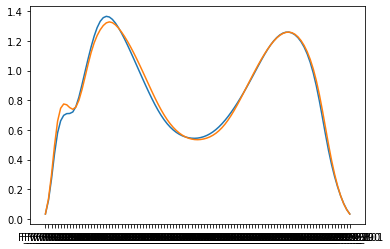

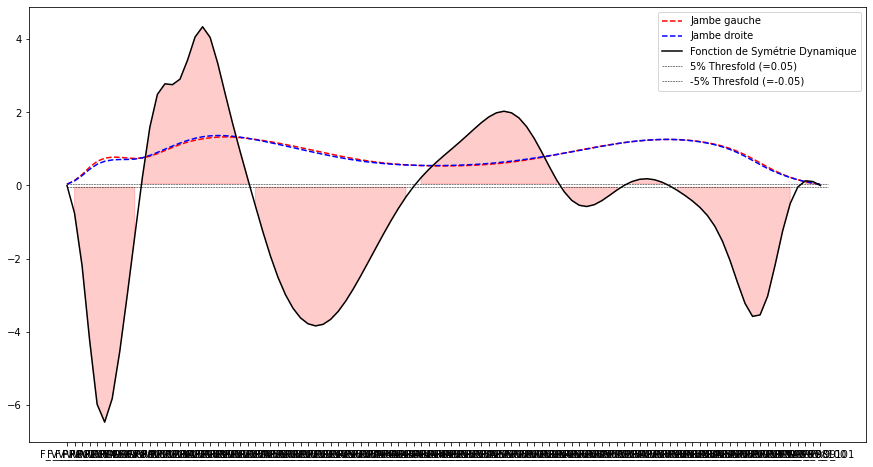

In [5]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunctionRealtime

DataSubject1Right['GrfMean'] = DataSubject1Right.mean(axis=1)
DataSubject1Left['GrfMean'] = DataSubject1Left.mean(axis=1)

plt.plot(DataSubject1Right['GrfMean'])
plt.plot(DataSubject1Left['GrfMean'])

PlotDynamicSymetryFunctionRealtime(DataSubject1Right['GrfMean'], DataSubject1Left['GrfMean'])

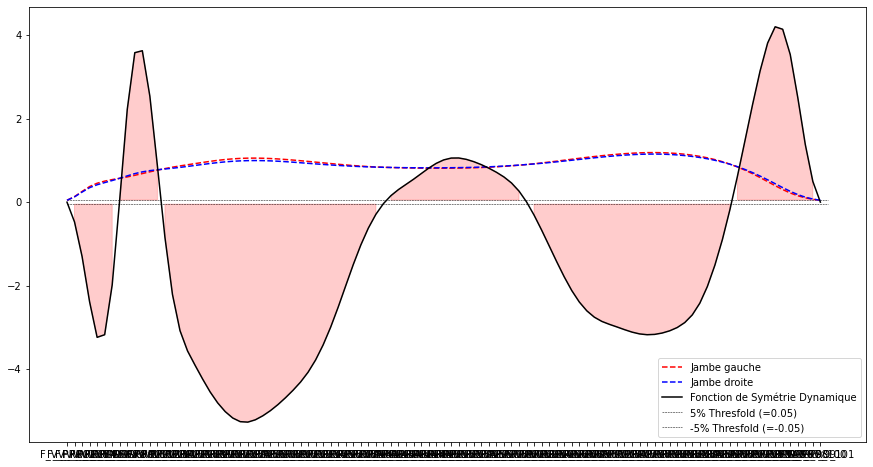

" Code très long attention ...\nfor ID in range(1,350):\n    DataSubjectIDLeft, DataSubjectIDRight = SelectSuject(ID, DataLeft, DataRight)\n    PlotDynamicSymetryFunctionRealtime(DataSubjectIDRight['GrfMean'], DataSubjectIDLeft['GrfMean'])\n"

In [6]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunctionRealtime
DataSubjectIDLeft, DataSubjectIDRight = SelectSuject(25, DataLeft, DataRight)
PlotDynamicSymetryFunctionRealtime(DataSubjectIDRight['GrfMean'], DataSubjectIDLeft['GrfMean'])

""" Code très long attention ...
for ID in range(1,350):
    DataSubjectIDLeft, DataSubjectIDRight = SelectSuject(ID, DataLeft, DataRight)
    PlotDynamicSymetryFunctionRealtime(DataSubjectIDRight['GrfMean'], DataSubjectIDLeft['GrfMean'])
"""

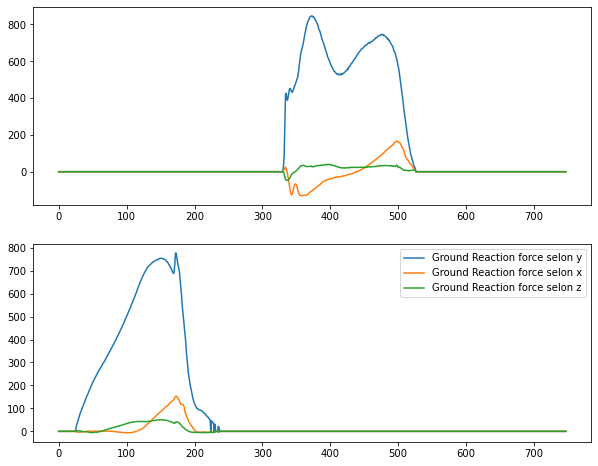

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df["Fy1"], label = "Ground Reaction force selon y")
plt.plot(df["Fx1"], label = "Ground Reaction force selon x")
plt.plot(df["Fz1"], label = "Ground Reaction force selon z")
plt.subplot(2,1,2)
plt.plot(df["Fy4"], label = "Ground Reaction force selon y")
plt.plot(df["Fx4"], label = "Ground Reaction force selon x")
plt.plot(df["Fz4"], label = "Ground Reaction force selon z")
plt.legend()
plt.show()

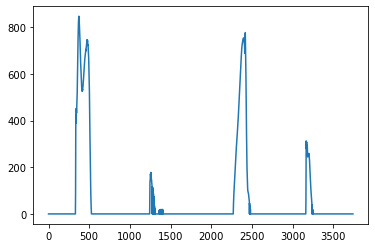

In [8]:
Grf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
plt.plot(Grf)

(748,)
(748,)
(748,)
(748,)
(748,)


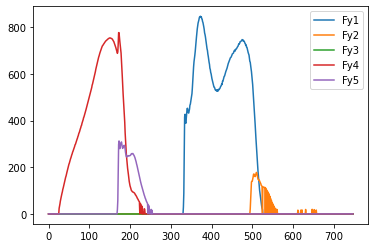

In [9]:
for grf in (df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]):
    plt.plot(grf, label = f'{grf.name}')
    plt.legend()
    print(grf.shape)

In [10]:
# Important sous forme de list !!!!!!!!!!!!!
VerticalGrf1 = df["Fy1"].tolist()
ApGrf1 = df["Fx1"].tolist()
VerticalGrf2 = df["Fy4"].tolist()
ApGrf2 = df["Fx4"].tolist()

In [11]:
from GetGrfValues import GetGrfValues
GrfValues1 = GetGrfValues(VerticalGrf1, ApGrf1)
GrfValues2 = GetGrfValues(VerticalGrf2, ApGrf2)

In [12]:
from DynamicSymetryFunctionProcedure import DynamicSymetryFunctionProcedure
DynamicSymetryFunctionProcedure(GrfValues1, GrfValues2)

,FirtPeak,MidstanceValley,SecondPeak,FirtPeakTimeTo,MidstanceValleyTimeTo,SecondPeakTimeTo,TimeFromMidstanceValleyToToeOff,FirtAndMidstanceImpulse,SecondAndPreswingImpulse,TotalVerticalGrfImpulse,BrakingPeak,PropulsivePeak,BrakePhaseDuration,PropulsivePhaseDuration,BrakePhaseTimeTo,PropulsivePhaseTimeTo,BrakingImpulse,PropulsiveImpulse
0,327.21,299.58,324.03,12.1,13.7,13.6,-12.7,6539.1825,-9604.7955,-3035.5855,123.52,-12.95,-2.0,3.0,5.3,0.1,616.273,-62.343


In [13]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunction
VerticalGrf1 = df["Fy1"][405:].tolist() # courbe bleue
VerticalGrf2 = df["Fy4"][:-405].tolist() # courbe rouge
PlotDynamicSymetryFunction(VerticalGrf1, VerticalGrf2)

ImportError: cannot import name 'PlotDynamicSymetryFunction' from 'DynamicSymetryFunctionProcedure' (c:\Users\Nathan\Desktop\Recherche\Github\semelle_connecte\DynamicSymetryFunctionProcedure.py)

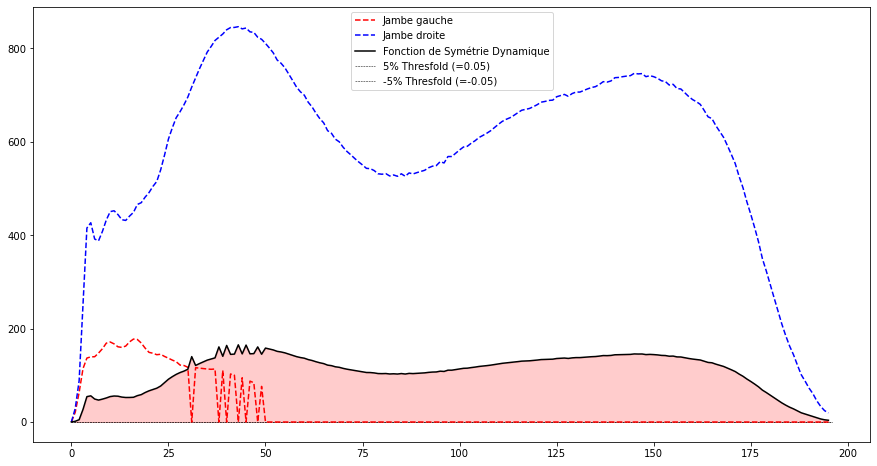

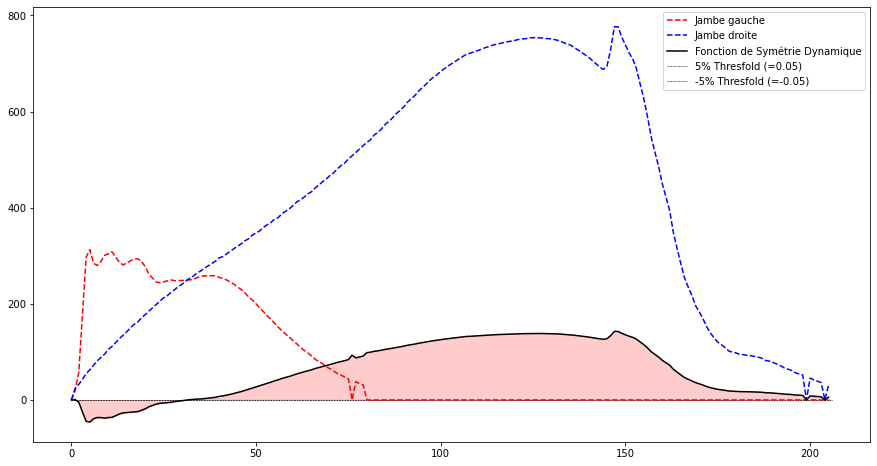

In [14]:
from MakeDictStep import MakeDictStep
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunctionRealtime

VerticalGrf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
ApGrf = np.concatenate((df["Fx1"], df["Fx2"], df["Fx3"], df["Fx4"], df["Fx5"]))
VerticalGrfStep, ApGrfStep = MakeDictStep(VerticalGrf, ApGrf)

VerticalGrfRight = VerticalGrfStep[0]
VerticalGrfLeft = VerticalGrfStep[1]
PlotDynamicSymetryFunctionRealtime(VerticalGrfRight, VerticalGrfLeft)

VerticalGrfRight = VerticalGrfStep[2]
VerticalGrfLeft = VerticalGrfStep[3]
PlotDynamicSymetryFunctionRealtime(VerticalGrfRight, VerticalGrfLeft)

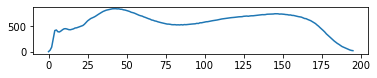

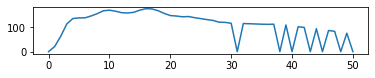

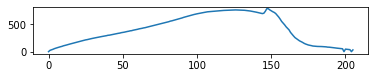

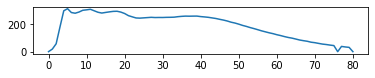

In [15]:
from MakeDictStep import MakeDictStep

VerticalGrf = np.concatenate((df["Fy1"], df["Fy2"], df["Fy3"], df["Fy4"], df["Fy5"]))
ApGrf = np.concatenate((df["Fx1"], df["Fx2"], df["Fx3"], df["Fx4"], df["Fx5"]))

VerticalGrfDict, ApGrf = MakeDictStep(VerticalGrf, ApGrf)

position = 0
for step in VerticalGrfDict:
    position += 1
    plt.subplot(len(VerticalGrfDict), 1, position)
    plt.plot(VerticalGrfDict[step])
    plt.show()

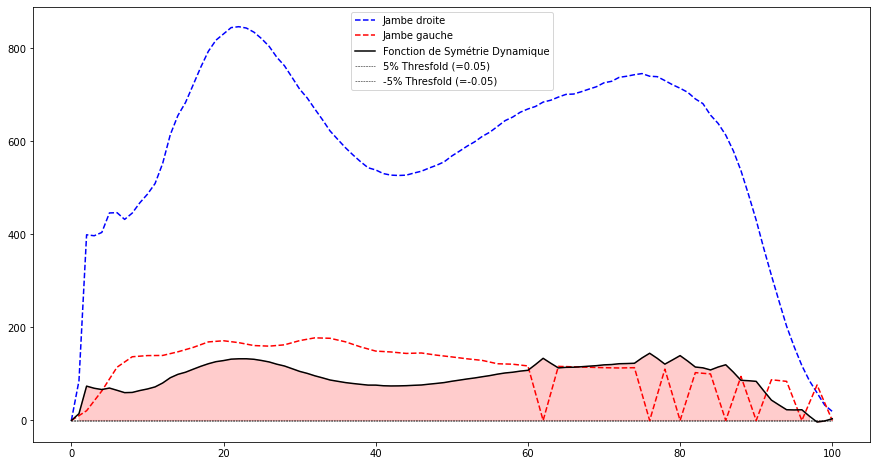

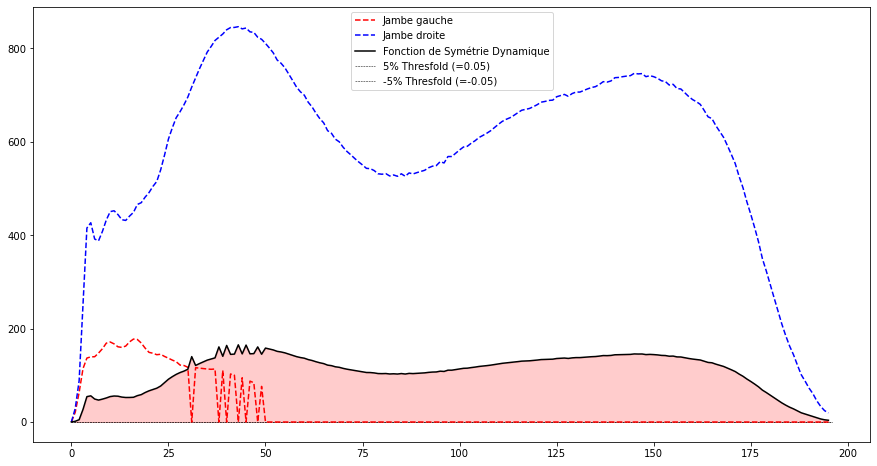

In [16]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunctionNormalised
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunctionRealtime
VerticalGrfRight = VerticalGrfDict[0]
VerticalGrfLeft = VerticalGrfDict[1]
PlotDynamicSymetryFunctionNormalised(VerticalGrfRight, VerticalGrfLeft)
PlotDynamicSymetryFunctionRealtime(VerticalGrfRight, VerticalGrfLeft)